# Problem set 1 (55 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

## Problem 1 (25 pts)

Assume we have a set of data points $x^{(i)}\in\mathbb{R}^{n},\,i=1,\dots,m$, and decide to represent this data as a matrix

$$
  X =
    \begin{pmatrix}
      | & & | \\
      x^{(1)} & \dots & x^{(m)} \\
      | & & | \\
    \end{pmatrix} \in \mathbb{R}^{n \times m}.
$$

We suppose that $\text{rank}\,X = r$.

In all tasks below, we ask you to find the rank of some matrix $M$ related to $X$.
In particular, you need to find relation between $\text{rank}\,X = r$ and $\text{rank}\,M$, e.g., that the rank of $M$ is always larger/smaller than the rank of $X$ or that $\text{rank}\,M = \text{rank}\,X \big / 35$.
Please support your answer with legitimate arguments and make the answer as accurate as possible.

Note that depending on the structure of the matrix $X$, border cases are possible.
Make sure to cover them in your answer correctly.

**Task 1.** (5 pts)
In applied statistics and machine learning, data is often normalized.
One particularly popular strategy is to subtract the estimated mean $\mu$ and divide by the square root of the estimated variance $\sigma^2$. i.e.
 $$x \rightarrow (x - \mu) \big / \sigma.$$

After the normalization, we get a new matrix
  \begin{equation}
    \begin{split}
      Y &:=
      \begin{pmatrix}
        | & & | \\
        y^{(1)} & \dots & y^{(m)} \\
        | & & | \\
      \end{pmatrix},\\
      y^{(i)} &:= \frac{x^{(i)} - \frac{1}{m}\sum_{i=1}^{m} x^{(i)}}{\sqrt{\frac{1}{m}\sum_{i=1}^{m} \left(x^{(i)}\right)^2 - \left(\frac{1}{m}\sum_{i=1}^{m} x^{(i)}\right)^2}}.
    \end{split}
  \end{equation}
  
What is the rank of $Y$ if $\text{rank} \; X = r$?

**Task 2.** (5 pts)
To reveal the structure of data one often considers similarity measures such as [cosine distance](https://en.wikipedia.org/wiki/Cosine_similarity)
  
  $$
    d_{c}\left(x^{(i)}, x^{(j)}\right) := 1 - \frac{\sum_{k=1}^{n}x^{(i)}_{k} x^{(j)}_{k}}{\sqrt{\sum_{k=1}^{n}\left(x^{(i)}_{k}\right)^{2}}\sqrt{\sum_{k=1}^{n}\left(x^{(j)}_{k}\right)^{2}}} = 1 - \frac{\left(x^{(i)}\right)^{\top} x^{(j)}}{\left\|x^{(i)}\right\|_{2}\left\|x^{(j)}\right\|_{2}}.
  $$

  Consider a matrix with cosine distances $D = [d_{ij}]$ such that
  $$
    d_{ij} = d_{c}\left(x^{(i)}, x^{(j)}\right).
  $$

  What is the rank of $D$ if $\text{rank} \; X = r$?

**Task 3.** (15 pts)
Transformation in Task 1 has a form $x \rightarrow a x + b$, where $a \in \mathbb{R}$ and $b \in \mathbb{R}^n$.
In this task, we explore more general transformations.

- Let $y^{(i)} = A x^{(i)} + b$, where $A\in \mathbb{R}^{p\times n}$, $b \in \mathbb{R}^{p}$. What possible ranks matrix
  \begin{equation}
    \begin{split}
      Y &:=
      \begin{pmatrix}
        | & & | \\
        y^{(1)} & \dots & y^{(m)} \\
        | & & | \\
      \end{pmatrix}
    \end{split}
  \end{equation}
  may have for different $A$?
  
  - If $p > n$ is it possible that $\text{rank}\,Y > \text{rank}\,X$?
  
  - If $p = n$ and both matrix $A$ and vector $b$ are not identically zeros how small the rank of $Y$ can be?

  - How large the rank of $Y$ can be?

- Let $y^{(i)} = w \odot x^{(i)} + b$, where $w, b \in \mathbb{R}^{n}$ and $\odot$ is an [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)).

What possible ranks matrix $Y$ may have for different $w$ and $b$?

# Your solution is here

***Problem 1; Task 1:*** Let $\mu = \frac{1}{m}\sum_{i=1}^{m}x^{(i)}$ and each $\mu_{k}=\frac{1}{m}\sum_{i=1}^{m}x_{k}^{(i)}$, also, let $\sigma^{2} = \frac{1}{m}\sum_{i=1}^{m}\left(x^{(i)}\right)^2 - \mu$ and each $\sigma_{k}^{2} = \frac{1}{m}\sum_{i=1}^{m}\left(x_{k}^{(i)}\right)^2 - \mu_{k}$. Then the transformation defined in the problem can be represented in two ways:

$First$ $way$:

$$y_{k}^{(i)} := \frac{x_{k}^{(i)}-\mu_{k}}{\sigma_{k}}$$

Let $$M := \begin{pmatrix}| & & |\\
\mu & \dots & \mu\\
| & & |\\
\end{pmatrix}
\in \mathbb{R}^{n\times m}\\
S := \begin{bmatrix}\sigma_{1}& 0 &\dots & 0\\
0 & \sigma_{2} & \dots & 0\\
: & : & \dots & :\\
0 & 0 & \dots & \sigma_{m}
\end{bmatrix} \in \mathbb{R}^{m \times m}$$
Where $S$ is a diagonal matrix. The transformation assumes that for each $k$, $\sigma_{k} \neq 0$. So, I will be going with the assumption that $S$ is invertible and hence has full rank (***Note that if X has a row with same entries through out, this fails to make S invertible as standard deviation would be zero***). The transformation to then get matrix $Y$ is:
\begin{align*}
Y = \left( X-M\right)S^{-1}\\
\end{align*}

$Second$ $way$:
\begin{align*}
x^{(j)}-\frac{1}{m}\sum_{i=1}^{m}x^{(i)}&= \frac{1}{m}\left(mx^{(j)}-\sum_{i=1}^{m}x^{(i)}\right)\\
&= \frac{1}{m}\left(mx^{(j)}-x^{(j)}-\sum_{i=1, i\neq j}^{m}x^{(i)}\right)\\
&=\frac{1}{m}\left((m-1)x^{(j)}-\sum_{i=1, i\neq j}^{m}x^{(i)}\right)\\
&= \frac{m-1}{m}x^{(j)}-\frac{1}{m}\sum_{i=1, i\neq j}^{m}x^{(i)}\\
\end{align*}

So we see a transformation that consists of the linear combination of the columns of $X$ for which the $jth$ column is formed by taking $\frac{m-1}{m}x^{(j)}$ and subtracting the sum of the other vectors multiplied by $\frac{1}{m}$. We get a symmetric, $T_{m}$ matrix defined thus: $T_{m} = [t_{ij}]$, $t_{ij}=-\frac{1}{m}$ for $i \neq j$ and $t_{ii} =\frac{m-1}{m}$.
$$T_{m} := \begin{bmatrix}\frac{m-1}{m}& -\frac{1}{m} &\dots & -\frac{1}{m}\\
-\frac{1}{m} & \frac{m-1}{m} & \dots & -\frac{1}{m}\\
: & : & \dots & :\\
-\frac{1}{m} & -\frac{1}{m} & \dots & \frac{m-1}{m}
\end{bmatrix} \in \mathbb{R}^{m \times m}$$
Then the transformation to get $Y$ is:
$$Y=XT_{m}S^{-1}$$.

Next, we try to get information on the ranks of $T_{m}$, $M$ and $S$ (although we are moving with the assumption that $S$ is full rank - $\text{rank }S=m$)

Rank of $M$:
Since the column space of $M$ consists of only one vector, $\mu$, the dimension of the null space is $1$ if $\mu$ is not $0$ vector and the dimension is $0$ otherwise. Hence, $\text{rank }M \leq 1$. (No need to add the lower bound since rank is always nonnegative integer)

Rank of $T_{m}$: We shall prove that this is equal to $m-1$ by showing that the dimension of the column space is $1$. Consider an arbitrary vector $\mathbf{v} \in \mathbb{R}^{m}$ from the null space $\Rightarrow T_{m}\mathbf{v}=0$. Let $v_i$ be the $ith$ component of vector $\mathbf{v}$. We then have,
\begin{align*}
T_{m}\mathbf{v} = 0 &\iff \left(-\frac{1}{m}\right)v_{1}+\left(-\frac{1}{m}\right)v_{2}+\dots +\left(\frac{m-1}{m}\right)v_{i}+\dots \left(-\frac{1}{m}\right)v_{m} = 0 \forall i\\
& \iff v_{i}-\frac{1}{m}\sum _{j=1}^{m}v_{j}=0 \forall i\\
&\iff v_{i}=\frac{\sum _{j=1}^{m}v_{j}}{m}\forall i\\
&\Rightarrow v_{i} = \frac{\sum _{j=1}^{m}v_{j}}{m} = v_{k} \text{ for arbitrary $k$}\\
&\Rightarrow \sum _{j=1}^{m}v_{j} = mv_{j}\\
&\Rightarrow \mathbf{v}= \begin{bmatrix}1\\
1\\
:\\
1\end{bmatrix}v_{j}\\
\end{align*}
It can also be easily shown that the column vector with inputs $1s$ is in the null space of $T_m$. Hence the dimension of the null space is $1$ and the rank of the matrix is $\text{rank } T_{m}=m-1$.

Now, by applying some [rank properties](https://en.wikipedia.org/wiki/Rank_(linear_algebra)#Properties).
First, we can use subadditivity property to get a weak bound. $Y=XT_{m}S^{-1} \iff YS = XT_{m}$ and $Y = (X-M)S^{-1} \iff YS = X - M$. Since we assume that $S$ has full rank, we have that $$\text{rank }(YS) =\text{rank }(Y)= \text{rank }(XT_{m}) = \text{rank }(X - M)$$
By subadditivity, we have that, $$\text{rank }(Y) = \text{rank }(X - M) \leq \text{rank }(X) + \text{rank }(-M) = \text{rank }(X) + \text{rank }(M)\leq r + 1$$

Now let us get a stronger bound.
$$\text{rank }(AB) \leq \text{min }(\text{rank }(A), \text{rank }(B)) \Rightarrow \text{rank }(Y)= \text{rank }(XT_{m}) \leq \text{min }(\text{rank }(X), \text{rank }(T_{m})) = \text{min }(r, m-1) \leq r$$. Also, by Sylvester's rank inequality, $$\text{rank }(Y)= \text{rank }(XT_{m}) \geq \text{rank }(X) + \text{rank }(T_{m}) - m
\Rightarrow \text{rank }(Y) \geq r +m-1 -m = r-1$$
Thus, we have that $r-1 \leq \text{rank }(Y) \leq r$. Since rank is a non negative integer, we have $\text{rank }(Y) = r$ or $\text{rank }(Y)=r-1$.

For case $\text{rank }(Y) = r-1$ we provide an example.
\begin{align*}
X = \begin{pmatrix}
2& 0\\
0& 2\\
\end{pmatrix} \rightarrow Y = \begin{pmatrix}
1& -1\\
-1& 1\\
\end{pmatrix}
\end{align*}

For case $\text{rank }(Y) = r$ we provide an example.
\begin{align*}
X = \begin{pmatrix}
2& 0\\
2& 0\\
\end{pmatrix} \rightarrow Y = \begin{pmatrix}
1& -1\\
1& -1\\
\end{pmatrix}
\end{align*}

***Problem 1; Task 2:*** Let $\hat{\mathbf{x}}$ be the unit vector parallel and in same direction to $\mathbf{x}$. Let $$\hat{X}=
    \begin{pmatrix}
      | & & | \\
      \hat{x}^{(1)} & \dots & \hat{x}^{(m)} \\
      | & & | \\
    \end{pmatrix} \in \mathbb{R}^{n \times m}.
$$
It is obvious that the column space of $\hat{X}$ and $X$ are the same. Hence, the rank of $\hat{X}$ is $r$. Let, $F \in \mathbb{R}^{m \times m}$ be a matrix where all entries are $1$. $$F := \begin{bmatrix}1& 1 &\dots & 1\\
1 & 1 & \dots & 1\\
: & : & \dots & :\\
1 & 1 & \dots & 1
\end{bmatrix}$$
Next, we can show that the transformation $D$ is equivalent to $D = F - \hat{X}^T\hat{X}$ (***Note that if any column of X is all zeroes, this transformation is not possible as the length of that column vector would zero***). By property of [Gram matrix](https://en.wikipedia.org/wiki/Gram_matrix), we have that $\text{rank }(\hat{X}^T\hat{X})=\text{rank }(\hat{X}) = \text{rank }(X) = r$. It can also be easily gotten that $\text{rank }(F) = 1$

By subadditivity, we have that,
\begin{align*}
\text{rank }(D) = \text{rank }(F - \hat{X}^T\hat{X}) &\leq \text{rank }(F) + \text{rank }(-\hat{X}^T\hat{X})\\
&= \text{rank }(F) + \text{rank }(\hat{X}^T\hat{X})\\
&= 1 + r\\
\Rightarrow \text{rank }(D) &\leq r+1\\
\text{Also, } \hat{X}^T\hat{X} = F - D\\
\text{rank }(\hat{X}^T\hat{X}) = r = \text{rank }(F - D) &\leq \text{rank }(F) + \text{rank }(-D)\\
&= \text{rank }(F) + \text{rank }(D)\\
&= 1 + \text{rank }(D)\\
\Rightarrow r-1 &\leq \text{rank }(D)\\
\text{Hence, } r-1 &\leq \text{rank }(D) \leq r+1\\
\text{rank }(D) = r-1 \text{ or } \text{rank }(D) &= r \text{ or } \text{rank }(D)=r+1\\
\\
\end{align*}

For case $\text{rank }(D) = r+1$ we provide an example.
\begin{align*}
X = \begin{pmatrix}
1& 0& 1\\
0& 1& 1\\
0& 0& 0\\
\end{pmatrix} \rightarrow D = \begin{pmatrix}
0& 1& 1-\frac{\sqrt{2}}{2}\\
1& 0& 1-\frac{\sqrt{2}}{2}\\
1-\frac{\sqrt{2}}{2}& 1-\frac{\sqrt{2}}{2}& 0\\
\end{pmatrix}
\end{align*}

For case $\text{rank }(D) = r$ we provide an example.
\begin{align*}
X = \begin{pmatrix}
1& 0\\
0& 1\\
\end{pmatrix} \rightarrow D = \begin{pmatrix}
0& 1\\
1& 0\\
\end{pmatrix}
\end{align*}

For case $\text{rank }(D) = r-1$ we provide an example.
\begin{align*}
X = \begin{pmatrix}
1& 1\\
\end{pmatrix} \rightarrow D = \begin{pmatrix}
0& 0\\
0& 0\\
\end{pmatrix}
\end{align*}


***Problem 1; Tasks 3.1, 3.2:***
Let matrix $B$ be defined thus:
$$B :=
      \begin{pmatrix}
        | & & | \\
        b & \dots & b \\
        | & & | \\
      \end{pmatrix} \in \mathbb{R}^{p \times m}
$$
Where the column space of $B$ consists of one vector, so $\text{rank }(B)=1$ or $0$ if $b$ is the zero vector. $\text{rank }(B) \leq 1$. It can then be shown that $Y = AX + B$. Also, $\text{rank }(AX) \leq \text{ min}(\text{rank }(A), \text{rank }(X)) \leq \text{rank }(X)$

By subadditivity, we have,

\begin{align*} \text{rank }(Y) = \text{rank }(AX + B) &\leq \text{rank }(AX) + \text{rank }(B)\\
\Rightarrow \text{rank }(Y) &\leq \text{rank }(X) +1\\
\end{align*}
This inequality shows that it might be possible, now let's find an example. Set $p=4$, $n=3$, $m=3$
\begin{align*}
&A := \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
0 & 0 & 0\\
\end{bmatrix}\\
&X := \begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 2\\
0 & 0 & 0\\
\end{bmatrix}\\
&b:= \begin{bmatrix}
0\\
0\\
0\\
3\\
\end{bmatrix}\\
\text{This gives rise to such matrix for Y }\\
\\
&Y:= \begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 2\\
0 & 0 & 0\\
3 & 3 & 3\\
\end{bmatrix}\\
\end{align*}

It is easy to check that $\text{rank }(Y) = 3 >\text{rank }(X) = 2$.

***Problem 1; Tasks 3.3, 3.4:*** If $b$ is not identically zero, then $\text{rank }(B) = 1$. To bound the rank of $Y$, we can Sylvester's rank inequality and get $\text{rank }(Y-B) = \text{rank }(AX) \geq \text{rank }(A)+\text{rank }(X) - n = \text{rank }(A)+\text{rank }(X) - p$. (Since we are given the condition that $p=n$)

By subadditivity, $$\text{rank }(Y) +1 =\text{rank }(Y)+\text{rank }(B)=\text{rank }(Y)+\text{rank }(-B) \geq\text{rank }(Y-B)$$

Combining these results,
$$\text{rank }(Y)+1\geq \text{rank }(A)+\text{rank }(X)-p\\ \Rightarrow \text{rank }(Y) \geq \text{rank }(A) + \text{rank }(X) -p -1$$.

So, $\text{rank }(Y)$ is at least $\max (0, \text{rank }(A) + \text{rank }(X) - 1 -p)$, since rank is always greater than zero.

As ealier gotten in this task, $\text{rank }(Y)$ is at most $\text{rank }(X) + 1$. ($\text{rank }(Y) \leq \text{rank }(X) +1$)

***Problem 1; Task 3.5:*** Let $\Omega := \begin{bmatrix}\omega_{1}& 0 &\dots & 0\\
0 & \omega_{2} & \dots & 0\\
: & : & \dots & :\\
0 & 0 & \dots & \omega_{n}
\end{bmatrix} \in \mathbb{R}^{n \times n}$
where $\omega_i \text{ is the $ith$ component of the vector } \omega$

Then the Hadamard task can be interpreted in the language of linear transformation as $Y = \Omega X + B$, where the definition of $B$ is analogous as in previous task ($m$ columns of vector $b$). Then by subadditivity, $\text{rank }(Y) +1 \geq \text{rank }(Y)+\text{rank }(B)=\text{rank }(Y)+\text{rank }(-B) \geq\text{rank }(Y-B)$

And, by Sylvester's rank inequality,

$$\text{rank }(Y-B) = \text{rank }(\Omega X) \geq \text{rank }(\Omega)+\text{rank }(X) - m$$

$$\Rightarrow \text{rank }(Y) \geq \text{rank }(\Omega)+\text{rank }(X) - m -1\\
\Rightarrow \text{rank }(Y) \geq \max(0, \text{rank }(\Omega)+\text{rank }(X) - m -1)$$

$$\Rightarrow \text{min }(n, m) \geq \text{rank }(Y) \geq \max(0, \text{rank }(\Omega)+\text{rank }(X) - m -1)$$ since we know the rank is at most the minimum of the dimension of a matrix. Setting $\omega$ and $b$ to be the zero vectors or vectors with only $1s$ as entries, we can get some edge cases.

## Problem 2 (10 pts)

- Let $\| \cdot \|$ and $\| \cdot \|'$ be norms on a vector space $X$, and let $B$ and $B'$ denote the corresponding close unit balls.
Prove that $B \subseteq B'$ iff $\| \cdot \|' \leq \| \cdot \|$ for any input vectors.
    
Let $1 \leq p \leq q \leq \infty$:

-  Prove that $\| \cdot \|_q \leq \| \cdot \|_p$ on $\mathbb{R}^n$

- Show that there exists a constant $C = C(n,p,q) > 0$ such that $\| \cdot \|_p \leq C\| \cdot \|_q$ on $\mathbb{R}^n$

- Can the above constant be chosen in such a way that it does not depend on $n$?

- Find the smallest possible $C(n,p,q)$ with the above property.

# Your solution is here
***Problem 2, task 1:***
Let us define $B$ and $B'$ thus - $B:= \{ x| \|x\| \leq 1\} \text{ and } B':= \{x|\|x\|' \leq 1\}$.
\begin{align*}
\|\cdot\|' \leq \|\cdot\| &\iff (\|x\| \leq C\Rightarrow \|x\|' \leq C)\forall x \in X \text{ and } \forall C \in \mathbb{R}^+\\
&\iff \left(\|\frac{x}{C}\| \leq 1 \Rightarrow \|\frac{x}{C}\|' \leq 1 \right)\forall x \in X \text{ and } \forall C \in \mathbb{R}^+\\
&\iff \left(\frac{x}{C} \in B \Rightarrow \frac{x}{C} \in B'\right)\forall x \in X \text{ and } \forall C \in \mathbb{R}^+\\
&\iff (B \subseteq B')\\
\\
\end{align*}
***Problem 2, task 2:***
Define a function $f: \mathbb{R}^{+}_{0} \rightarrow \mathbb{R}$, thus: $$f(x) = (1+x)^{p} - x^p - 1 \text{ where } 1\leq p $$
We want to show that, $0\leq f(x)$. First we compute the derivative, $f'(x) = p(1+x)^{p-1} - px^{p-1}$. Now, for nonnegative $x$, we use the fact that $g(x)=x^{r} \Rightarrow g'(x) = rx^{r-1} \geq 0$ given that $r, x \geq 0$, hence $g$ is increasing if $r, x \geq 0$. Thus,
\begin{align*}
x &\leq (1+x)\\
\Rightarrow x^{p-1} &\leq (1+x)^{p-1}\\
\Rightarrow px^{p-1} &\leq p(1+x)^{p-1}\\
0 &\leq f'(x)\\
\end{align*}

Hence, we have that $f$ is increasing. $f(0)=0$ thus, we have that $0\leq f(x)$. Next, we prove by induction the following fact:
\begin{align*}
&(|x_1|+|x_2|+\dots+|x_n|)^p \geq |x_1|^p+|x_2|^p+\dots+|x_n|^p\\
&|x_1|^p \geq |x_1|^p\\
\end{align*}
Statement holds obviously for $n=1$. Suppose true up to $n-1$.
\begin{align*}
(|x_1|+|x_2|+\dots+|x_{n-1}|)^p &\geq |x_1|^p+|x_2|^p+\dots+|x_{n-1}|^p\\
f\left(1 + \frac{|x_{n}|}{|x_1|+|x_2|+\dots+|x_{n-1}|} \right) &\geq 0\\
\Rightarrow \left(1 + \frac{|x_{n}|}{|x_1|+|x_2|+\dots+|x_{n-1}|} \right)^{p} &\geq \left(\frac{|x_{n}|}{|x_1|+|x_2|+\dots+|x_{n-1}|} \right)^p + 1\\
(|x_1|+|x_2|+\dots+|x_{n-1}|+|x_n|)^p &\geq |x_n|^p + (|x_1|+|x_2|+\dots+|x_{n-1}|)^p\\
\text{And by the case $n-1$, we have}&\\
(|x_1|+|x_2|+\dots+|x_{n-1}|+|x_n|)^p &\geq |x_1|^p+|x_2|^p+\dots+|x_{n-1}|^p + |x_n|^p\\
\Rightarrow \sum_{i=1}^{n}|x_i|^{p} &\leq \left(\sum_{i=1}^{n}|x_i| \right)^p \\
\end{align*}
Proving the fact. We can use this fact. Setting $|x_i| \rightarrow |x_i|^p \geq 0$ and $p \rightarrow \frac{q}{p} \geq 1$. We get,
\begin{align*}
\sum_{i=1}^{n}(|x_i|^{p})^\frac{q}{p} \leq \left(\sum_{i=1}^{n}|x_i|^p \right)^\frac{q}{p}
&\iff  \left(\sum_{i=1}^{n}|x_i|^q \right)^\frac{1}{q}\leq \left(\sum_{i=1}^{n}|x_i|^p \right)^\frac{1}{p} \\  &\iff  \| \cdot \|_q \leq \| \cdot \|_p \\
\end{align*}
We know that $\| \mathbf{x} \|_{\infty} = |x_{max}|$, now $$\left(\sum_{i=1}^{n}|x_i|^p \right)^\frac{1}{p}=|x_{max}|\left(\sum_{i=1}^{n}\frac{|x_i|^p}{|x_{max}|^p} \right)^\frac{1}{p} = |x_{max}|\left(1+\sum_{i=1, i\neq max}^{n}\frac{|x_i|^p}{|x_{max}|^p} \right)^\frac{1}{p} \geq |x_{max}|\\ \Rightarrow \|\cdot\|_{p} \geq \|\cdot\|_{\infty}$$

***Problem 2; tasks 3, 4, 5:***
Define the $M_p(|x_1|, |x_2|, \dots , |x_n|)$ to be the [general mean with equal weights](https://en.wikipedia.org/wiki/Generalized_mean). Given $1\leq p\leq q$, by general, mean inequality, we have,
$$M_p(|x_1|, |x_2|, \dots , |x_n|) \leq M_q(|x_1|, |x_2|, \dots , |x_n|)\\ \Rightarrow  \left(\frac{1}{n}\sum_{i=1}^{n}|x_i|^p \right)^\frac{1}{p} \leq \left(\frac{1}{n}\sum_{i=1}^{n}|x_i|^q \right)^\frac{1}{q}\\
\Rightarrow \frac{\|\cdot\|_p}{n^\frac{1}{p}} \leq \frac{\|\cdot\|_q}{n^\frac{1}{q}}\\
\Rightarrow \|\cdot\|_p \leq n^{\frac{1}{p}-\frac{1}{q}}\|\cdot\|_q \\
\Rightarrow \|\cdot\|_q \leq \|\cdot\|_p \leq n^{\frac{1}{p}-\frac{1}{q}}\|\cdot\|_q \\
\Rightarrow 1 \leq \frac{\|\cdot\|_p}{\|\cdot\|_q} \leq n^{\frac{1}{p}-\frac{1}{q}} $$
At some point above, we applied the result got from task 2.

We have that $C=C(n, p, q) = n^{\frac{1}{p}-\frac{1}{q}}$. It can be shown that $C(n, p, q)$ is the minimum possible constant. We see that, for any $p\leq q$, $\frac{\|\cdot\|_p}{\|\cdot\|_q} \leq C(n, p, q)$ with equality holding when all $x_is$ are equal (The condition of General Mean Inequlaity). Suppose we can choose a constant, $K$ independent of $n$, such that $\|\cdot\|_p \leq K\|\cdot\|_q$, since $C$ is the minimum, we have that $K \geq \text{sup}\frac{\|\cdot\|_p}{\|\cdot\|_q} = C$. Since, $C$ can grow infinitely large depending on $n$, we have that such $K$ does not exist.

## Problem 3: Recover 3D molecule structure via low-rank approximation (20 pts)

***Chromatin***

Imagine you are given the task of understanding the structure of a complex geometric shape, but there's a catch: you can not observe the shape directly in three dimensions.
Instead, you can only infer its structure by studying the points of contact between different parts of the shape.
This is analogous to the challenge faced in 3D chromatin modeling, where the goal is to understand the three-dimensional organization of the DNA sequence within a cell's nucleus—a structure too tiny and complex to be directly observed in detail.

To tackle this, scientists employ a technique known as Hi-C.
The Hi-C technique generates a symmetric matrix such that elements in the matrix quantify the interaction frequencies between pairs of chromatin segments.
The higher values indicate a higher propensity for spatial proximity.
We consider $N$ segments, therefore the dimension of the resulting matrix is $N \times N$.

Mathematically, the matrix is sparse due to the infrequent interactions between most DNA segments and has a block diagonal structure reflecting clusters of interactions within certain genomic regions.
The matrix patterns are analyzed using algorithms and statistical models to infer the three-dimensional chromatin structure.

Let us inspect what Hi-C looks like!

In [ ]:
!pip install plotly
!pip install patsy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt, cm
from matplotlib import colors

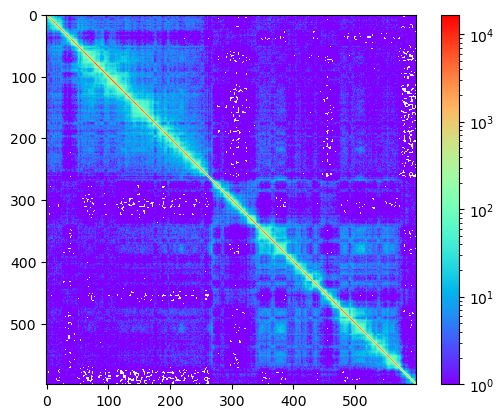

C shape (599, 599) n=599


In [ ]:
path = 'IMR90_100kb_chr20.csv'
C = np.array(pd.read_csv(f'{path}', header=None))

# Removes the blanks obainted during the experiment
mask = (C == 0).all(0)
index = np.where(~mask)[0]
C = C[~mask,:]
C = C[:,~mask]


im = plt.imshow(C, cmap=cm.rainbow, norm=colors.LogNorm())
plt.colorbar(im)
plt.show()

print('C shape', C.shape, f'n={C.shape[0]}')

Recall that our goal is to infer the 3D chromatin structure.
Mathematically, we model the chromatin as a smooth curve in 3D space.
That is, the points lie on a smooth parametrized curve $x_1, \ldots x_n \in \gamma(t)$, where $\gamma(t)=\left(\begin{array}{c}\gamma_1(t) \\ \gamma_2(t) \\ \gamma_3(t)\end{array}\right)$.

Each coordinate can be expanded using [cubic spline basis functions](https://en.wikipedia.org/wiki/Spline_interpolation) $h_1(t), \ldots, h_k(t)$ evaluated at the sequence of coordinates at $t=1, \ldots, n = 599$  :
$$
\gamma_j(t)=\sum_{\ell=1}^k \Theta_{\ell j} h_{\ell}(t), \quad j=1,2,3
$$

$$
x_i=\gamma(i)=
\begin{pmatrix}
\sum_{\ell=1}^k \Theta_{\ell 1} h_{\ell}(i) \\
\sum_{\ell=1}^k \Theta_{\ell 2} h_{\ell}(i) \\
\sum_{\ell=1}^k \Theta_{\ell 3} h_{\ell}(i)
\end{pmatrix}
$$

$$
X=\begin{pmatrix}
-x_1^\top - \\
\cdots \\
-x_n^\top-
\end{pmatrix}
=
\begin{pmatrix}
\mid & \mid & \mid \\
\gamma_1 & \gamma_2 & \gamma_3 \\
\mid & \mid & \mid
\end{pmatrix} \in \mathbb{R}^{n \times 3}
$$

Thus, we can rewrite the coordinates of the chromatin stacked in matrix $X$ as product $X=H \Theta$, where

$$
H=\begin{pmatrix}
\mid & & \mid \\
h_1 & \ldots & h_k \\
\mid & & \mid
\end{pmatrix} \in \mathbb{R}^{n \times k}
$$

The optimization problem that will infer the 3D structure is the following:

$$
\ell\left(x_1, \ldots, x_n\right)=\sum_{i=1}^n \sum_{j=1}^n\left(Z_{i j}-\left\langle x_i, x_j\right\rangle\right)^2 \to \min_{\Theta \in \mathbb{R}^{k \times 3}}
$$

or equivalently

$$
 \min_{\Theta \in \mathbb{R}^{k \times 3}}\|Z-S(X)\|_F^2 = \min_{\Theta \in \mathbb{R}^{k \times 3}} \|Z-S(H \Theta)\|_F^2
$$

where $Z$ is a normalized Hi-C matrix and $S$ is some additional map.

The following cell performs the normalization step so you do not have to worry about it.

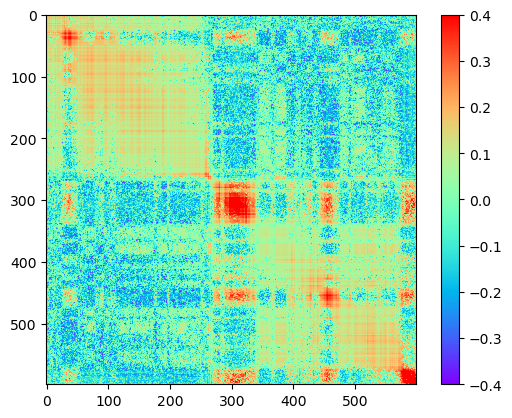

In [ ]:
import patsy

def scale(y, center=True, scale=True):
    x = y.copy()
    if center:
        x -= x.mean(axis=0)
    if scale and center:
        x /= x.std()
    return x

df = 50
n_knots = df - 4
knots = np.linspace(1, max(index), n_knots, dtype='int64')
knots = knots[1:n_knots-1]
B0 = patsy.bs(index, df = df, include_intercept=True)
H = B0[::]

D = 1/(C+1)
Z = -D**2/2
Z = scale(Z, center = True, scale = False)
Z = (scale(Z.T, center = True, scale = False)).T

im = plt.imshow(Z, cmap=cm.rainbow, norm=colors.Normalize(vmin=-0.4, vmax=0.4))
plt.colorbar(im)
plt.show()

**Task 1.** (5 pts) Prove the Lemma:

If $H \in \mathbb{R}^{n \times k}$ is a matrix with orthogonal columns, i.e. $H^\top H=I$, and $S(X)=X X^\top$ then problem

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \|Z-S(H \Theta)\|_F^2
$$

is equivalent to

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \left\|H^T Z H-\Theta \Theta^T\right\|_F^2.
$$

# Your solution is here
We can apply properties of cyclic properties of trace and properties of [Frobenius norm ($\|\cdot\|_{F}$)](https://en.wikipedia.org/wiki/Frobenius_inner_product) for real valued matrices: $\|A^TA\|_{F}=\|AA^T\|_{F}=\|A\|_{F}^{2}$, $\|A-B\|_{F}^{2}=\|A\|_{F}^{2}+\|B\|_{F}^{2}-2\text{tr}(AB)$.

\begin{align*}
\|Z-S(H \Theta)\|_F^2 &= \|Z-H \Theta\Theta^TH^T\|_F^2 \\
&= \|Z\|_F^2 + \|H \Theta(H\Theta)^T\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)\\
&= \|Z\|_F^2 + \|(H\Theta)^TH \Theta\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)\\
&= \|Z\|_F^2 + \|\Theta^TH^TH \Theta\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)\\
&= \|Z\|_F^2 + \|\Theta^T \Theta\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)\\
\left\|H^T Z H-\Theta \Theta^T\right\|_F^2 &= \left\|H^T Z H\right\|_F^2 + \left\|\Theta \Theta^T\right\|_F^2 - 2\text{tr}(H^TZH \Theta\Theta^T)\\
&= \left\|H^T Z H\right\|_F^2 + \left\|\Theta^T \Theta\right\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)\\
\end{align*}

Let $\left\|\Theta^T \Theta\right\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T)$ be denoted by $f(\Theta)$. Then,

$$\min_{\Theta \in \mathbb{R}^{k \times 3}} \|Z-S(H \Theta)\|_F^2 = \min_{\Theta \in \mathbb{R}^{k \times 3}}(\|Z\|_F^2 + \|\Theta^T \Theta\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T))\\
= \|Z\|_F^2 + \min_{\Theta \in \mathbb{R}^{k \times 3}}f(\Theta)\\
$$

And

$$\min_{\Theta \in \mathbb{R}^{k \times 3}} \left\|H^T Z H-\Theta \Theta^T\right\|_F^2 = \min_{\Theta \in \mathbb{R}^{k \times 3}}(\|H^TZH\|_F^2 + \|\Theta^T \Theta\|_F^2 - 2\text{tr}(ZH \Theta\Theta^TH^T))\\
= \|H^TZH\|_F^2 + \min_{\Theta \in \mathbb{R}^{k \times 3}}f(\Theta)\\
$$

We can see that in both cases, it boils down to minimising $f(\Theta)$.

**Task 2.** Solving the problem

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \left\|H^\top Z H-\Theta \Theta^\top\right\|_F^2.
$$

can be interpreted as approximating the matrix $H^\top Z H$ by a positive semidefinite rank-3 matrix $\Theta \Theta^\top$.

Assuming that the symmetric matrix $H^\top Z H$ has at least $3$ positive eigenvalues the solution can be found via eigendecomposition of $H^\top Z H$:

Let $H^\top Z H=Q \Lambda Q^\top$ for orthogonal $Q$ and diagonal $\Lambda=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_n\right)$ with $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n$, then

$$
\Theta=Q \sqrt{\Lambda_3} \text {, where } \sqrt{\Lambda_3}=\operatorname{diag}\left(\sqrt{\lambda_1}, \sqrt{\lambda_2}, \sqrt{\lambda_3}, \ldots, 0, 0\right) .
$$

The computational efficiency of the approach derives from the fact that it relies on eigen-decomposition of a small $k \times k$ matrix, requiring only $O\left(k^3\right)$ additional operations.

In this task, we will write a function that finds the optimal 3D chromatin representation for the given Hi-C matrix.
We do that by optimizing the functional from task 1.



- (5 pts) If you recall, the lemma from task 1 requires $H$ to have orthogonal columns.
Write a code to verify whether it is true. If it is not, propose and compare the ways to ortogonalize it.


- (10 pts) You are given below a template for function ```low_rank_approximation```.
Complete the code for minimizing  $\tilde{\ell}(\Theta)$ using the proposed low rank approach.
Remember that we model chromatin as 3D curve so the rank of our decomposition should be 3.
However, compare it for different ranks: plot the loss value against the ranks (small, medium, large) and plot the reconstructed matrix.
Which rank would be a good fit?

In [ ]:
def are_columns_orthogonal(matrix, tol=1e-10):
    dot_products = matrix.T @ matrix
    off_diagonal_sum = np.sum(np.abs(dot_products - np.diag(np.diagonal(dot_products))))
    return off_diagonal_sum < tol

is_orthogonal = are_columns_orthogonal(H)

if is_orthogonal:
    print("The columns of H are orthogonal.")
else:
    print("The columns of H are not orthogonal.")

# If H is not orthogonal, propose and compare ways to orthogonalize it
if not is_orthogonal:
    # Propose and apply a method to orthogonalize H, e.g., Gram-Schmidt process
    orthogonalized_H = np.linalg.qr(H)[0]

    # Check if the orthogonalized matrix is indeed orthogonal
    is_orthogonalized = are_columns_orthogonal(orthogonalized_H)

    if is_orthogonalized:
        print("After orthogonalization, the columns of H are now orthogonal.")
    else:
        print("Orthogonalization did not succeed in making the columns of H orthogonal.")
H = orthogonalized_H
H

The columns of H are not orthogonal.
After orthogonalization, the columns of H are now orthogonal.


array([[-6.51379967e-01, -3.05360877e-01,  1.72197890e-01, ...,
         1.16882104e-13,  7.18124381e-14,  2.84444414e-14],
       [-5.09548635e-01, -1.01455598e-01,  3.49084713e-02, ...,
         1.73073469e-14,  1.06346542e-14,  4.19930513e-15],
       [-3.89962149e-01,  5.87941602e-02, -6.12222214e-02, ...,
        -4.88145501e-14, -2.99917877e-14, -1.18709328e-14],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.11106269e-02,  2.73769068e-01, -2.93544967e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.59415870e-03,  1.61305786e-01, -4.95429256e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -7.49053288e-01]])

We can use the Housholder transformation (QR decomposition) to get a good approximation for orthogonalisation since it is a more stable algorithm. The numpy algorithm actually utilises this.
Other methods of orthogonalisation are:

Gram–Schmidt process, which uses projection

Givens rotation

Symmetric orthogonalization, which uses the Singular value decomposition

The optimal loss value is 0.024434653807743647


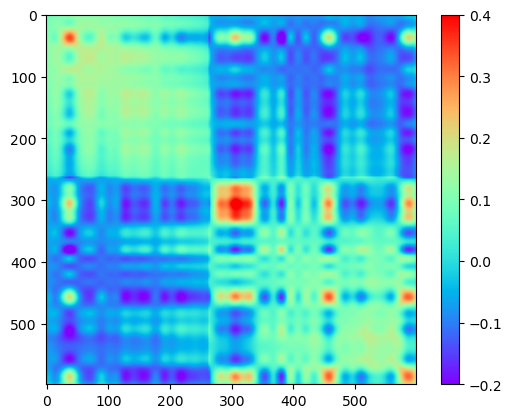

In [ ]:

loss_ = lambda X, Z: np.mean((Z - X @ X.T)**2)

def low_rank_approximation(Z, H, rank=3):
    '''
    Solves the minimization problem from task 1 using diagonalization

    - Z: normalized Hi-C counts matrix
    - H: orthogonal matrix
    - rank: the rank of the eigendecomposition

    returns:
    - Theta: optimal Theta
    - loss: calculated using `loss_`
    - adj_rank: the rank adjusted for numerical stability. Usage: adj_rank = np.sum(eigen_values > 1e-12)
    '''

    # Eigenvalue decomposition of H
    eigenvalues, eigenvectors = np.linalg.eigh(H.T @ Z @ H)

    # Select the top-rank eigenvectors
    top_eigenvectors = eigenvectors[:, -rank:]

    # Diagonal matrix of eigenvalues
    diagonal_matrix = np.diag(np.sqrt(eigenvalues[-rank:]))

    # Optimal Theta based on diagonalization
    Theta = top_eigenvectors @ diagonal_matrix

    # Reconstruction of X
    X = H @ Theta

    adj_rank = np.sum(eigenvalues > 1e-12)

    return {'Theta': Theta,
            'X': X,
            'loss': loss_(X, Z),
            'adj_rank': adj_rank}

Theta, X, loss, rank = low_rank_approximation(Z, H, rank=3).values()
Z_hat = X @ X.T
print('The optimal loss value is', loss)

im = plt.imshow(Z_hat, cmap=cm.rainbow, norm=colors.Normalize(vmin=-0.2, vmax=0.4))
plt.colorbar(im)
plt.show()

In [ ]:
Theta @ Theta.T

array([[ 0.54030422, -0.69087154, -0.8341042 , ..., -0.29862481,
         0.2102539 , -0.06647736],
       [-0.69087154,  0.88443115,  1.06338257, ...,  0.4308615 ,
        -0.29373957,  0.09960432],
       [-0.8341042 ,  1.06338257,  1.3177405 , ...,  0.37168551,
        -0.29774239,  0.0891653 ],
       ...,
       [-0.29862481,  0.4308615 ,  0.37168551, ...,  2.67049925,
        -1.44368595,  0.82217143],
       [ 0.2102539 , -0.29373957, -0.29774239, ..., -1.44368595,
         0.80076936, -0.45309466],
       [-0.06647736,  0.09960432,  0.0891653 , ...,  0.82217143,
        -0.45309466,  0.26226459]])

In [ ]:
H.T @ Z @ H

array([[ 0.98019593, -1.16098333, -1.19114542, ..., -0.33954105,
        -0.27952866,  0.30068829],
       [-1.16098333,  1.39533335,  1.46200406, ...,  0.56607744,
        -0.29958483,  0.07648531],
       [-1.19114542,  1.46200406,  1.60052886, ...,  0.46389714,
        -0.53723863,  0.17902628],
       ...,
       [-0.33954105,  0.56607744,  0.46389714, ...,  4.75955476,
        -2.81892902,  1.89014224],
       [-0.27952866, -0.29958483, -0.53723863, ..., -2.81892902,
         1.76454799, -1.32863081],
       [ 0.30068829,  0.07648531,  0.17902628, ...,  1.89014224,
        -1.32863081,  0.94393764]])